In [73]:
import tweepy
import bs4
import re
import textblob as tx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [38]:
# Step 1 - Authenticate
consumer_key= 'IGdgl3AvLjf8M3eDg4LDfS752'
consumer_secret= 'tbIe2yf34ZXhx9mb8Vmlz6qTA72Rtd2w8n8Cqz9EK890UMl3Ws'

access_token='230026419-rCBLMyQC2EqJbO9a5ul5unyTGzeME60ozvsdIWX6'
access_token_secret='8v0OhF9VDS6lc322PSe3jDUYSb7o4QoJkt4B6C6QSLzAT'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth,)

In [36]:
len(tweet_dict['tweet'])

36

In [37]:
senti=[]
for i in tweet_dict['Sentiment']:
    if i > 0:
        senti.append('Positive')
    elif i < 0:
        senti.append('Negative')
    else:
        senti.append('Neutral')

In [38]:
len(senti)

36

In [218]:
tw=[]
for i in tweepy.Cursor(api.search, q=['#2019elections'], lang='en').items(1000):
    if i.text not in tw:
        #print(' '.join(re.sub("(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(@(_\w+))"," ", i.text).split()))
        #tw.append(' '.join(re.sub("(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(@(_\w+))"," ", i.text).split()))
        tw.append(i.text.lower())

In [220]:
rp = {'RT ':'','2019Elections':'','election':''}

In [223]:
cl_tw=[' '.join(re.sub("(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(@(_\w+))"," ", i).split()).replace_all(rp) for i in tw]

AttributeError: 'str' object has no attribute 'replace_all'

In [127]:
len(tw)
dict_tw={}
dict_tw['tweet']=[]
dict_tw['Sentiment']=[]

In [128]:
for i in cl_tw:
    dict_tw['tweet'].append(i)
    if tx.TextBlob(i).sentiment.polarity>0:
        dict_tw['Sentiment'].append('Positive')
    elif tx.TextBlob(i).sentiment.polarity<0:
        dict_tw['Sentiment'].append('Negative')
    else:
        dict_tw['Sentiment'].append('Neutral')
        

In [129]:
df = pd.DataFrame(dict_tw)

In [147]:
df['tweet']=df.tweet.str.lower()

In [148]:
df.head()

,tweet,Sentiment,Congress
0,listen to my segment quick s shout out on anch...,Positive,0
1,update aap admits they will lose all 7 seats ...,Neutral,1
2,the story of is that babas have probably pass...,Positive,0
3,irrespective of who you are you are supposed t...,Neutral,0
4,you are as bad if you are trying to defend the...,Negative,0


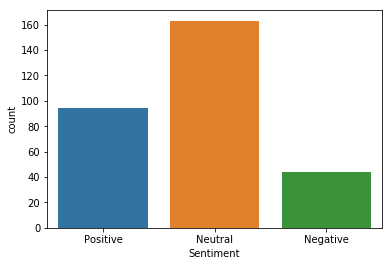

In [149]:
sns.countplot(df.Sentiment)

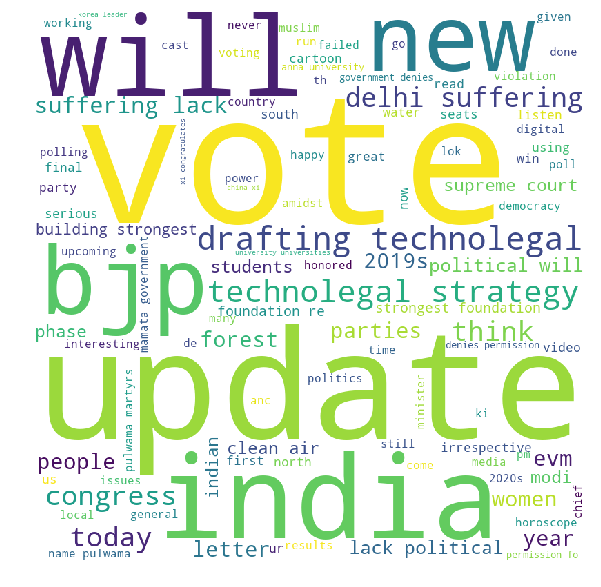

In [150]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(df.tweet.to_string()) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [213]:
import numpy as np
df['Congress']=np.where(df['tweet'].str.contains('congress'),1,0)
df['BJP']=np.where(df['tweet'].str.contains('bjp'),1,0)

In [214]:
df.head()


,tweet,Sentiment,Congress,BJP
0,listen to my segment quick s shout out on anch...,Positive,0,0
1,update aap admits they will lose all 7 seats ...,Neutral,1,0
2,the story of is that babas have probably pass...,Positive,0,0
3,irrespective of who you are you are supposed t...,Neutral,0,0
4,you are as bad if you are trying to defend the...,Negative,0,0


In [163]:
from nltk import word_tokenize,pos_tag
from nltk.corpus import stopwords

In [210]:
cong = [i for i in word_tokenize(df[df['Congress']==1].tweet.to_string()) if i not in set(stopwords.words('english'))]
cong_key = list(filter( lambda x:  len(re.findall(r'^([0-9])+|\.+',x))==0,cong))
cong_adj= [i[0] for i in pos_tag(cong_key) if i[1] in ['JJ','JJR','JJS']]
' '.join(cong_adj)

'update fight revive indian candida update aap mamata fo mamata better digital update local update better digital serious update local serious congress'

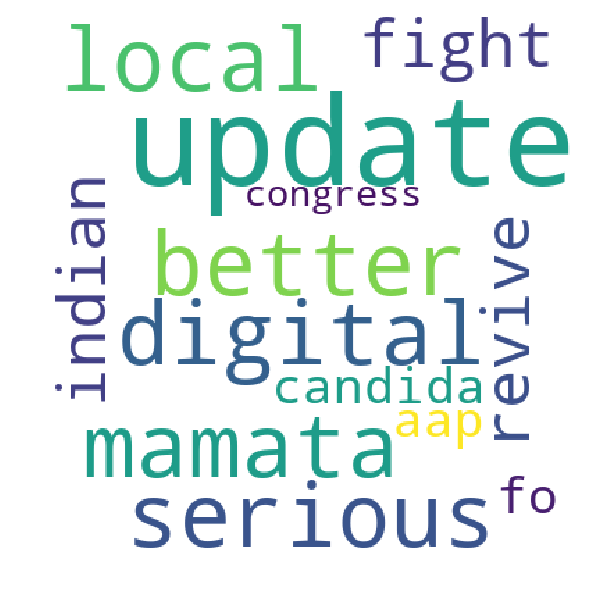

In [212]:
wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(' '.join(cong_adj)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [215]:
bjp = [i for i in word_tokenize(df[df['BJP']==1].tweet.to_string()) if i not in set(stopwords.words('english'))]
bjp_key = list(filter( lambda x:  len(re.findall(r'^([0-9])+|\.+',x))==0,bjp))
bjp_adj= [i[0] for i in pos_tag(bjp_key) if i[1] in ['JJ','JJR','JJS']]
' '.join(bjp_adj)

'walas islam anna congress revive indian laugh muslims better digital weake better digital siruvani bjp first update multiple west anna gross'

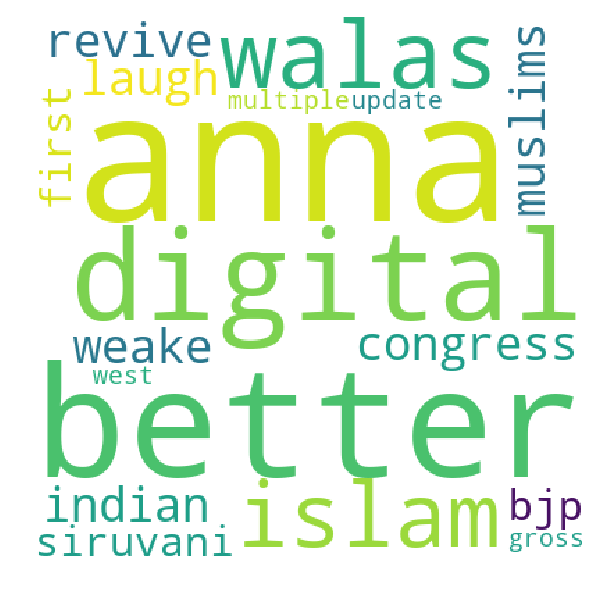

In [216]:
wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(' '.join(bjp_adj)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 